In [2]:
import os
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"

sns.set(font=font_family,rc={"axes.unicode_minus":False})

In [3]:
norm=stats.norm(loc=70,scale=10)

In [4]:
s_x=np.linspace(-10,150,2000)

s_pdf=norm.pdf(s_x)

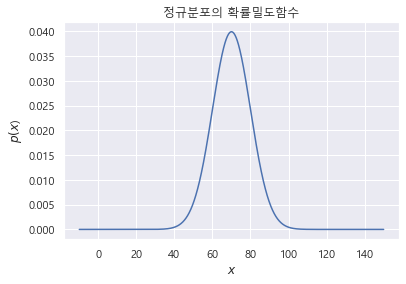

In [5]:
plt.plot(s_x,s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x$)")
plt.show()

In [6]:
s_cdf=norm.cdf(s_x)

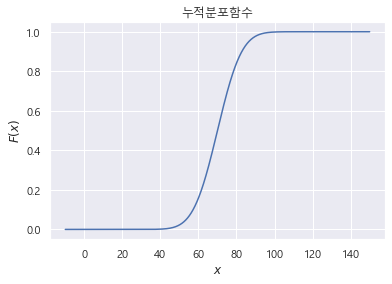

In [7]:
plt.plot(s_x,s_cdf)
plt.title("누적분포함수")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

In [8]:
stan_norm=stats.norm(loc=0,scale=1)

sn_x=np.linspace(-5,5,1000)

sn_pdf=stan_norm.pdf(sn_x)

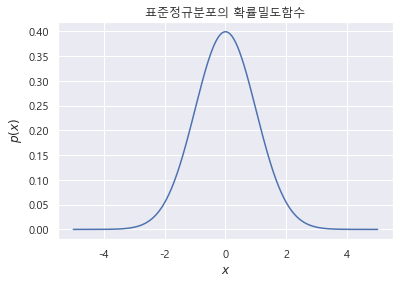

In [9]:
plt.plot(sn_x,sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [10]:
n_data=np.random.randint(1,100,size=1000)
n_data=np.sort(n_data)

In [11]:
n_data.shape

(1000,)

In [12]:
n_mean=np.mean(n_data)
print('mean:',np.mean(n_data))

n_std=np.std(n_data)
print('standard deviation:',np.std(n_data))

mean: 50.334
standard deviation: 28.573981941619547


In [13]:
norm_n_data=stats.norm(loc=n_mean,scale=n_std)

n_pdf=norm_n_data.pdf(n_data)

In [14]:
n_data.shape

(1000,)

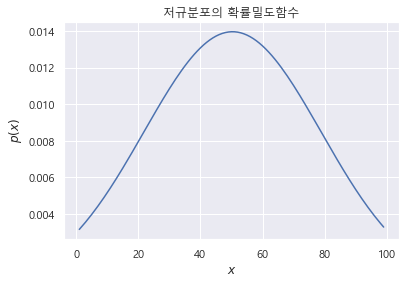

In [15]:
plt.plot(n_data,n_pdf)
plt.title("저규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

In [16]:
z_data=list(n_data)
z_data_list=[]

for i in z_data:
    z=(i-n_mean)/n_std
    z_data_list.append(z)

In [17]:
norm_z_data=stats.norm(loc=0,scale=1)
z_pdf=norm_z_data.pdf(z_data_list)

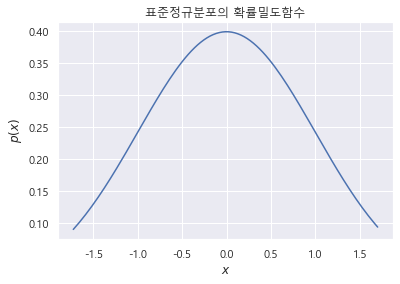

In [18]:
plt.plot(z_data_list,z_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

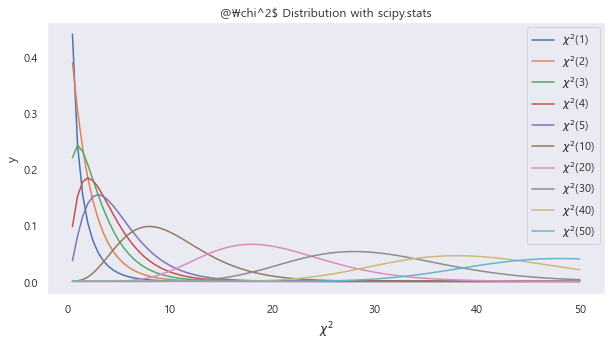

In [21]:
from scipy.stats import chi2

chi_X=np.linspace(0.5,50,100)

plt.figure(figsize=(10,5))
for dof in [1,2,3,4,5,10,20,30,40,50]:
    plt.plot(chi_X,stats.chi2(dof).pdf(chi_X),
            label=r'$\chi^2$('+str(dof)+')')
    
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'@\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()

In [23]:
x_o=[324,78,261]

x_e=[371,80,212]

x_crosstab=pd.DataFrame([x_o,x_e],
                       columns=['서울','인천','대구'],
                       index=['관찰도수','기대도수'])

In [24]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [25]:
from scipy.stats import chisquare

result=chisquare(x_o,f_exp=x_e)
result

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

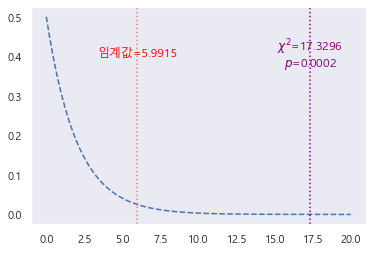

In [31]:
from scipy.stats import chi2

dof=2
x_chi_1=np.linspace(0,20,201)
pdf_chi=chi2(dof).pdf(x_chi_1)

x95_c=chi2(dof).ppf(.95)
plt.plot(x_chi_1,pdf_chi,'b--')

plt.axvline(x=x95_c,color='lightcoral',linestyle=':')
plt.text(x95_c,.4,'임계값='+str(round(x95_c,4)),
        horizontalalignment='center',color='red')

plt.axvline(x=result[0],color='purple',linestyle=':')
plt.text(result[0],.4,r'$\chi^2$='+str(round(result[0],4)),va='bottom',
         horizontalalignment='center',color='purple')
plt.text(result[0],.4,r'$p$='+str(round(result[1],4)),va='top',
         horizontalalignment='center',color='purple')
plt.grid()
plt.show()